<a href="https://colab.research.google.com/github/AlexeyRogS/cv_course/blob/main/week1/opencv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План занятия:

## 1. Вводная часть
* Какие задачи решает область компьютеного зрения
* Что будем проходить на курсе
### 1.1 Что такое изображение
* Получение изображения
* Цветовые модели и пространства
* Форматы изображений
### 1.2 Какие задачи решает область компьютеного зрения

## 2. Практическая часть
### 2.1 Бибилотеки для работы с изображениями в Python:
### 2.2 Знакомство с OpenCV
* Операции ввода/вывода
* Работа с цветовыми пространствами
* Базовые операции с изображениями
* Рисуем на картинках
* Операции с бинарными изображениями

### 3. Домашнее заданиe

---


# Какие задачи решает область компьютеного зрения

<img src="https://i.ibb.co/yQJ0tQB/cv.png" height="400" width="800">

# Что будем проходить
* Общие принципы работы с изображениями
* Классические алгоритмы компьтерного зрения (в общих чертах)
* Глубокое обучение на PyTorch
* Сверточные нейронные сети
* Классификация, детекция, генерация изображений

# 1.1 Что такое изображение

### Что мы понимаем под изображением?

* Отображение из 3D в 2D.
* Передача цвета объектов.

Как получить изображение?

<img src="https://i.ibb.co/3yzGPzY/pinhole-1.png" height="400" width="800">

### Pinhole camera model

<img src="https://i.ibb.co/3rMZp2g/pinhole-2.png" width="800" height="400">

### Camera obscura

<img src="https://i.ibb.co/6J1NxFB/camera-obscura.jpg" height="400" width="700">

### Использование линзы

<img src="https://i.ibb.co/ySHswFv/lense.png" height="400" width="800">

### Литература:
* [камера обскура](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BC%D0%B5%D1%80%D0%B0-%D0%BE%D0%B1%D1%81%D0%BA%D1%83%D1%80%D0%B0)
* [CS231A Course Notes 1: Camera Models](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

## Цифровое изображение:

Цифровое изображение является функцией f(x, y), где

    Для черно-белых изображений f(x, y) = яркость в пикселе [x, y]
    Для цветных изображений (RGB) f(x, y) = [red(x, y), blue(x, y), green(x, y)]

Если задать значения для функции f(x, y) в каждой точке, то мы получим двумерную или трехмерную матрицу с числами.
<br> Обычно это числа от 0 до 255.
<br> Но зачастую диапазоны могут быть и другими. Например, очень часто используются изображения-маски, где в каждом элементе матрицы может быть либо 0, либо 1.

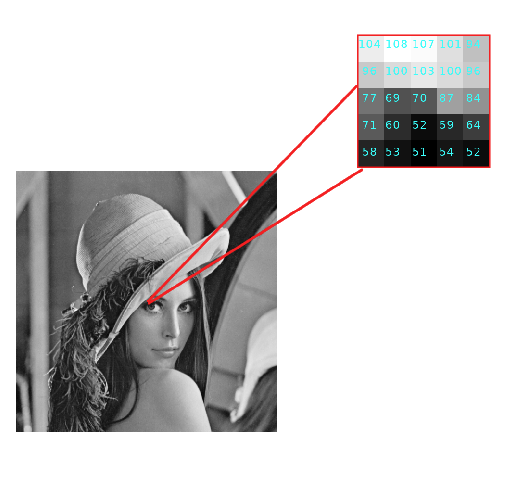

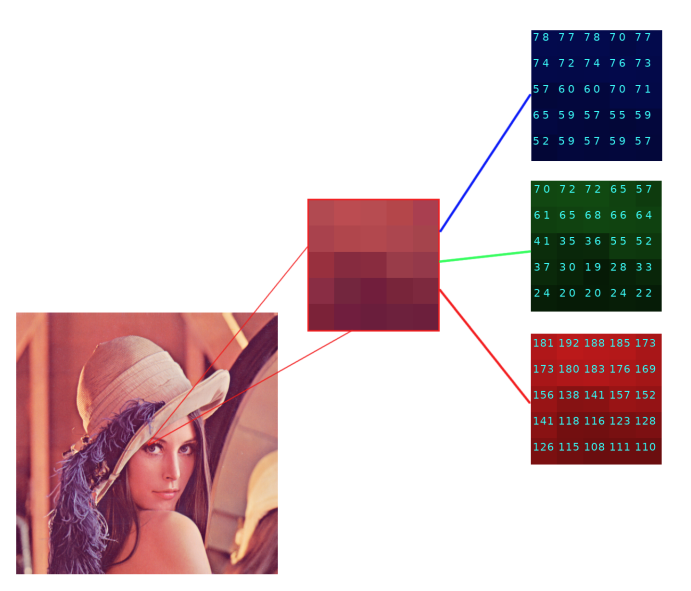

Начало координат всегда находится в левом верхнем углу. Ось `X` отвечает за ширину изображения. Ось `Y` отвечает за высоту.

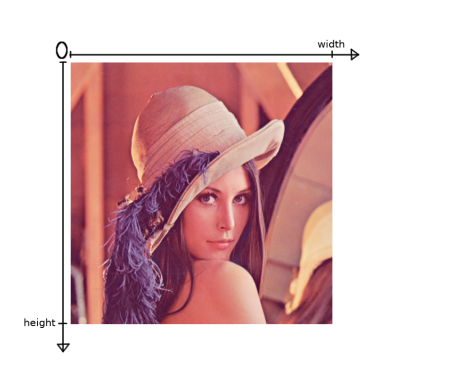

**PS**: все числа на изображениях вверху реальные, можете проверить :) Для этого необходимо вывести значение пикселей изображения с в следующих диапазонах по ширине с 255 по 259 включительно, по высоте аналогично.

## Свет и цвет

* Свет - электромагнитное излучение
* Цвет - субъективное восприятие света

<img src="https://i.ibb.co/b68CQ6p/color-prism.jpg" height="250" width="700">

В наших глазах есть два типа рецепторов, это палочки и колбочки. <br>
* Палочки отвечают за монохромное восприятие цветов при низкой освещенности.
* Колбочки в свою очередь отвечают за восприятие цветов.

В нашем глазу примерно 6—7 миллионов колбочек. <br>
Примерно 65% из них воспринимают красный свет, 33 % - зеленый свет, и только 2% - синий цвет. <br>
Как вы уже догадались, именно поэтому в качестве основных цветов выбраны красный, зеленый и синий. <br>

При этом в дневное время человеческий глаз наиболее чувствителен к свету
длины волны 555нм (зеленый цвет). Это важный факт, на его основе подобраны
коэффициенты для преобразования цветных изображений в [черно-белые](https://en.wikipedia.org/wiki/Grayscale) и создан
фильтр [байра](https://en.wikipedia.org/wiki/Bayer_filter).

## Цветовые модели и пространства

**Цветовая модель** — это математическая модель описания представления цветов в виде кортежей чисел (обычно 1, 3 или 4), называемых цветовыми компонентами или цветовыми координатами.

**Цветовое пространство** — все возможные значения цветов, задаваемые моделью.

Существует множество различных цветовых моделей: [RGB](https://ru.wikipedia.org/wiki/RGB), [CMYK](https://ru.wikipedia.org/wiki/CMYK), [XYZ](https://ru.wikipedia.org/wiki/%D0%A6%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C#%D0%A6%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%BE_CIE_XYZ), [HSV](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C)), [HSL](https://ru.wikipedia.org/wiki/HSL), [YCbCr](https://ru.wikipedia.org/wiki/YCbCr) и т.д. В данном уроке мы не будем охватывать все их.




### XYZ
Модель XYZ является мастер-моделью практически всех остальных цветовых моделей, используемых в технических областях.
Отличное описание данной модели есть на Хабре в данной [статье](https://habr.com/ru/post/209738/) или на медиуме в следующей [статье](https://medium.com/hipster-color-science/a-beginners-guide-to-colorimetry-401f1830b65a). Здесь мы пробежимся только по основным моментам. Также рекомендую [это](https://www.youtube.com/watch?v=82ItpxqPP4I&t=400s&ab_channel=CraigBlackwell) видео.

<img src=https://www.researchgate.net/publication/306264840/figure/fig5/AS:614364306497538@1523487273429/The-setup-of-a-colour-matching-experiment.png/>

[Источник](https://arxiv.org/pdf/2004.03402.pdf)

<img src=https://ars.els-cdn.com/content/image/3-s2.0-B9780128149768000117-f11-02-9780128149768.jpg>

<img src="https://i.ibb.co/FKvN9c2/chromaticity-diagram.png" width="500" height="500">

### RGB
Одна из самых распространенных цветовых моделей, которая используется в компьютерном зрении. RGB является аддитивной модель. То есть цвета получаются путём добавления к чёрному цвету.

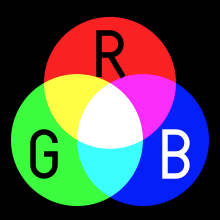

### HSV
**Hue** — цветовой тон, (например, красный, зелёный или сине-голубой).

**Saturation** — насыщенность. Чем больше этот параметр, тем «чище» цвет.

**Value** (значение цвета) или яркость.


В отличие от RGB цветовая модель HSV отображают информацию о цвете в более привычной человеку форме: Что это за цвет? Насколько он насыщенный? Насколько он светлый или тёмный?

Наиболее просто визуализировать пространство HSV в трехмерном пространстве — цилинрдрическая система координат, где:

**Hue**  определяется полярным углом

**Saturation** — радиус-вектором

**Value** — Z-координатой

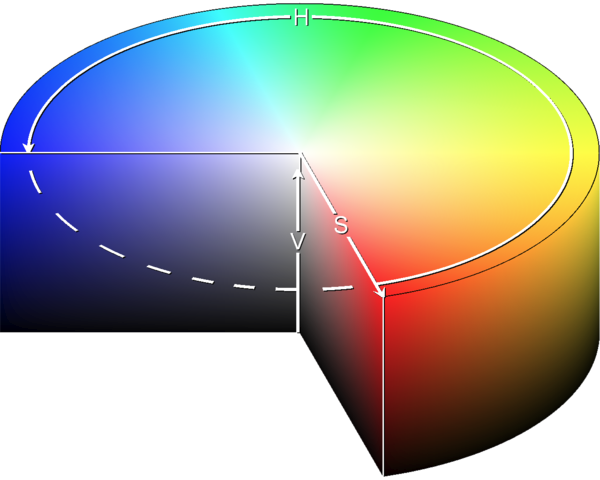

Ниже приведена визуализация преобразования **RGB -> HSV -> RGB.**

In [ ]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="https://upload.wikimedia.org/wikipedia/commons/transcoded/5/59/RGB_2_HSV_conversion_with_grid.ogg/RGB_2_HSV_conversion_with_grid.ogg.480p.vp9.webm" type="video/webm">
    </video>
""")

## Форматы изображений

### Растровое изображение

<img src="https://i.ibb.co/TmsTkjC/raster.png" height="300" width="600">

Растровое изображение состоит из пикселей (из матрицы чисел) <br>
Типичные форматы:
* [JPEG](https://www.adobe.com/creativecloud/file-types/image/raster/jpeg-file.html)
* [GIF](https://www.adobe.com/creativecloud/file-types/image/raster/gif-file.html)
* [PNG](https://www.adobe.com/creativecloud/file-types/image/raster/png-file.html)
* [BMP](https://www.adobe.com/creativecloud/file-types/image/raster/bmp-file.html)
* [TIFF](https://www.adobe.com/creativecloud/file-types/image/raster/tiff-file.html)
<br>

Камеры и фотоаппараты работают с растровыми изображениями, большинство цифровых изображений - растровые. <br>
<br>
Основные достоинства: <br>
* совместимость форматов
* гибкие при обработке (возможность редактировать отдельные пиксели).
<br>

Основные недостатки:
* снижение качества при увеличении
* рост размера при увеличении разрешения

### Векторное изображение

<img src="https://i.ibb.co/rmJD8F3/vector.png" height="300" width="600">

Векторное изображение состоит описания примитивов (математические формулы для кривых, заливки и цветов) <br>
Типичные форматы:
* [SVG](https://www.adobe.com/creativecloud/file-types/image/vector/svg-file.html)
* [EPS](https://www.adobe.com/creativecloud/file-types/image/vector/eps-file.html)
* [PDF](https://en.wikipedia.org/wiki/PDF)
* [AI](https://www.adobe.com/creativecloud/file-types/image/vector/ai-file.html)
* [DXF](https://www.adobe.com/creativecloud/file-types/image/vector/dxf-file.html)

Векторные изображения применяются преимущественно в цифровых иллюстрациях, типографии, логотипах. <br>
 <br>
Основные достоинства: <br>
* сохраненние разрешения при масштабировании
* сохранение размера при масштабировании
<br>

Основные недостатки: <br>
* Проблемы с совместимостью форматов
* Меньшая гибкость в форматировании


## Вопросы:
* В чем преимущество объектива с линзой по сравнению с простым отверстием?
* Чем отличается цвет и свет?
* Можно ли перевести растровое изображение в векторное и наоборот?
* Какая из задач компьютерного зрения показалась вам наиболее интересной?

---

# 2 Практическая часть

## 2.1 Бибилотеки для работы с изображениями в Python


* [OpenCV](https://docs.opencv.org/4.x/index.html)
* [scikit-image](https://scikit-image.org/)
* [Pillow](https://pillow.readthedocs.io/en/stable/)

## 2.2 Знакомство с OpenCV
OpenCV это open source библиотека компьютерного зрения, которая предназначена для анализа и обработки изображений. С данный библиотекой можно работать в языках C, C++, Python и Java. Мы же с вами сосредоточимся только на Python.


# Установка opencv

Чтобы установить библиотеку opencv, как и большинство друих библиотек, в python можно воспользоваться командой pip или pip3:

```bash
pip3 install opencv-python
```

По умолчанию будет скачена наиболее актуальная стабильная версия библиотеки. Доступные версии можно посмотреть на [PyPI](https://pypi.org/project/opencv-python/) либо если не терпится установить самую свежую версию или необходимо собрать под конкретную платформу, то следует воспользоваться следующим [репозиторием](https://github.com/opencv/opencv-python).


Существует расширенная библиотека `OpenCV`, называемая `opencv-contrib` (ссылка на [PyPI](https://pypi.org/project/opencv-contrib-python/)). В python также устанавливается через pip:

```bash
pip3 install opencv-contrib-python
```


### Установим зависимости, необходимые для урока
Для того, чтобы вызвать команды bash прямо из ноутбука, то просто поставьте перед ними символ `!` и запустите ячейку. Ячейка ниже нужна для того, чтобы запустить установку необходимых пакетов для урока. Если данные зависимости у вас уже установлены, то просто игнорируйте ее.


In [ ]:
!pip install opencv-python matplotlib numpy

Строчки ниже нужны для того, чтобы у нас корректно работали виджеты.

In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [ ]:
!pip install ipympl

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

## Начало работы

Заимпортируем необходимые модули:

In [ ]:
# Это для реальной работы
import cv2
import numpy as np

# Это для визуализаций
import ipywidgets as widgets
from IPython.display import display, HTML
from matplotlib import pyplot as plt

Зачастую (почти всегда) очень важно знать версию пакета, который используется в проекте. Нам тут не очень интересно, какой версии у нас установлен matplotlib, но очень важно, какая версия у opencv.

In [ ]:
print(cv2.__version__)

Для начала стоит познакомиться с базовыми операциями ввода/вывода. Скачаем какое-нибудь изображение. <br>

Ниже мы воспользуемся командами [mkdir](https://ru.wikipedia.org/wiki/Mkdir) для создания директории и [wget](https://www.gnu.org/software/wget/manual/wget.html) для скачивания изображения. <br>
Если вы не знаете, что делает та или иная команда, то можно воспользоваться
командой `<имя команды> --help`. Это позволит вам отобразить документацию прямо в консоли, но она не всегда очень понятная и возможна необходимость гуглить.




In [ ]:
!mkdir -p input_files & wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -q -O ./input_files/lenna.png

Opencv позволяет нам делать базовые i/o манипуляции. Но помимо загрузки картинки и сохранения, opencv также позволяет сохранить картинку в различных форматах. ([Список поддерживаемых форматов](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) достаточно широк). <br>
Мы с вами скачали изображение [Лены](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B0_(%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)) в форматие `png`. Давайте попробуем открыть ее и посмотреть на то, что у нас получилось и сохранить, но уже в другом формате:

In [ ]:
image = cv2.imread('./input_files/lenna.png')
print(type(image), image.shape)

In [ ]:
cv2.imwrite('./output_files/lenna.jpg', image)

Обратите внимание, что ничего не произошло, но при этом метод `imwrite` вернул значение `False`. Для сохранения картинки нам необходимо, чтобы директория существовала. Создадим ее и попробуем снова:

In [ ]:
!mkdir -p output_files
cv2.imwrite('./output_files/lenna.jpg', image)

Продемонстрируем как рисовать изображения в скрипте

In [ ]:
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(image);

Существует также функция `cv2.imshow()` для отрисовки изображений, но она крашит ноутбуки, поэтому в колабе она отключена. При этом ее часто используют в .py скриптах. Обычно, когда пользователю показывается картинка, то выполнение программы временно приостанавливается, ожидая реакции от пользователя. Такого поведения можно добиться с помощью cv2.waitKey(0). Смотрите пример ниже

```python
import cv2
PATH_TO_IMAGE = ... # задайте путь к картинке
image = cv2.imread(PATH_TO_IMAGE) # Считали картинку в формате BGR
cv2.imshow('Some text for your window', image) # Отрисовали в окошке. Учтите, что будет отрисовано нормально!
cv2.waitKey(0) # подождали, пока не нажмете любую клавишу, но остерегайтесь русской раскладки.
cv2.destroyAllWindows() # Закрыли все окна
```

#### Почему Лена в ноутбуке синяя, а на исходной картинке и на сохраненной нормальная? <br>


Все дело в том, что opencv по умолчанию использует BGR формат. Почему так? Вопрос хороший, и в документации на него нет ответа, но есть ответ [здесь](https://learnopencv.com/why-does-opencv-use-bgr-color-format/). Что же нам с этим делать? Ведь всем нам интуитивно удобнее работать с RGB форматом. Тут есть сразу несколько опций. Во-первых, нам ничего не мешает после загрузки изображения просто поменять каналы местами. <br>
Выше было видно, что загруженная картинка является numpy.ndarray, поэтому с ней можно производить любые стандартные операции! <br>
Это бывает очень удобно в некоторых ситуациях. Но также OpenCV предоставляет функцию [cvtColor](https://docs.opencv.org/4.5.3/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) для того, чтобы конвертировать изображение в нужный нам цветовой формат (доступные форматы с объеснениями можно посмотреть [здесь](https://docs.opencv.org/3.4.15/de/d25/imgproc_color_conversions.html) и [здесь](https://docs.opencv.org/3.4.15/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)).

In [ ]:
# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(image_rgb);

Если вы не совсем понимаете, что происходит ниже, то рекомендую заглянуть по данной [ссылке](https://scipy-lectures.org/advanced/advanced_numpy/index.html). Впрочем, рекомендую заглянуть, даже если вы все поняли.

In [ ]:
# Convert image from BGR to RGB with fancy indexing
image_rgb = image[:,:,::-1] # или так: image[:,:,[2, 1, 0]]

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(image_rgb);

Стоит учитывать, что изображения в opencv это просто матрицы без какой-либо метаинформации, так что мы сам должны помнить, в каком формате изображения находятся в данный момент времени.

In [ ]:
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))
for i, subplot in zip(range(3), plots):
    temp = np.zeros_like(image_rgb)
    temp[:,:,i] = image_rgb[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

Но на самом деле компьютер не видит это так, как на рисунке выше. Каждый канал для него всего лишь двумерная матрица. Если уж и показывать, как это выглядит на самом деле, то это будет вот так

In [ ]:
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))
for i, subplot in zip(range(3), plots):
    subplot.imshow(image_rgb[:,:,i], cmap='gray')
    subplot.set_axis_off()
plt.show()

# Базовые операции с изображением




## Цветовые пространства

Запустив фрагмент кода ниже мы можем интерактивно посмотреть на цвета в пространстве RGB.


In [ ]:
%matplotlib widget
from IPython.display import clear_output
img = np.zeros((100, 100, 3), dtype=np.uint8)

def update_plot(r, g, b):
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b
    display(img)
    print(f'Red = {r}, Green = {g}, Blue = {b}')

r = widgets.IntSlider(min=0, max=255, value=0, description='Red:')
g = widgets.IntSlider(min=0, max=255, value=0, description='Green:')
b = widgets.IntSlider(min=0, max=255, value=0, description='Blue:')
widgets.interactive(update_plot, r=r, g=g, b=b)

Запустив фрагмент кода ниже мы можем интерактивно посмотреть на цвета в пространстве HSV.


In [ ]:
hsv_image = np.zeros((100, 100, 3), dtype=np.uint8)
def update_plot(h, s, v):
    hsv_image[:,:,0] = h
    hsv_image[:,:,1] = s
    hsv_image[:,:,2] = v
    image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    display(image)
    #print(f'Red = {r}, Green = {g}, Blue = {b}')

h = widgets.IntSlider(min=0, max=180, value=0, description='Hue:')
s = widgets.IntSlider(min=0, max=255, value=0, description='Saturation:')
v = widgets.IntSlider(min=0, max=255, value=0, description='Value:')

widgets.interactive(update_plot, h=h, s=s, v=v)

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/0/0f/Hsv_Value_Chart.png" -q -O ./input_files/hsv.png
!wget "https://i.stack.imgur.com/01XJ7.png" -q -O ./input_files/hsv_circle.png

In [ ]:
img = cv2.imread('./input_files/hsv.png')
img = img[:,:,::-1]

def update_plot(hue, saturation, value):
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    bgr_image_copy = img.copy()
    bgr_image_copy[hsv_image[:,:,0] > hue[1]] = 0
    bgr_image_copy[hsv_image[:,:,1] > saturation[1]] = 0
    bgr_image_copy[hsv_image[:,:,2] > value[1]] = 0

    bgr_image_copy[hsv_image[:,:,0] < hue[0]] = 0
    bgr_image_copy[hsv_image[:,:,1] < saturation[0]] = 0
    bgr_image_copy[hsv_image[:,:,2] < value[0]] = 0
    display(bgr_image_copy)


hue = widgets.IntRangeSlider(value=[0, 180], min=0, max=180, description='Hue:')
value = widgets.IntRangeSlider(value=[0, 255], min=0, max=255, description='Value:')
saturation = widgets.IntRangeSlider(value=[0, 255], min=0, max=256, description='Saturation:')

widgets.interactive(update_plot, hue=hue, saturation=saturation, value=value)

## Обрезка (crop)
Обрезка изображения довольно частая операция. В общем виде это выглядит следующим образом:

In [ ]:
img = cv2.imread('./input_files/lenna.png', )
img = img[:,:,::-1]

def update_plot(x, y):
    print(f'x = {x}, y = {y}')
    image_copy = img.copy()
    image_copy[0:y[0],:] = 0
    image_copy[y[1]:,:] = 0

    image_copy[:, 0:x[0]] = 0
    image_copy[:, x[1]:] = 0
    display(image_copy)


x = widgets.IntRangeSlider(value=[0, 512], min=0, max=512, description='x:')
y = widgets.IntRangeSlider(value=[0, 512], min=0, max=512, description='y:')

widgets.interactive(update_plot, x=x, y=y)

В примере выше на самом деле не происходит никакой обрезки изображения. Мы просто закрашиваем черным цветом все на изображении вне указанных на слайдерах координатах.

In [ ]:
img = cv2.imread('./input_files/lenna.png')[:,:,::-1]

start_row, end_row = 175, 375
start_col, end_col = 200, 375
cropped = img[start_row:end_row, start_col:end_col]

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cropped);

В примерах выше у нас всегда начальная координата была меньше, чем конечная. Как вы думаете, что будет, если начальная координата окажется меньше или равна конечной? Попробуйте разобраться с этим в ячейке ниже.

In [ ]:
img = cv2.imread('./input_files/lenna.png', )
img = img[:,:,::-1]

start_row, end_row = 175, 375
start_col, end_col = 200, 375
cropped = img[start_row:end_row, start_col:end_col]


plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cropped)

## Повороты

Для того, чтобы повернуть изображение, нам необходимо переместить каждый пиксель исходного изображения с координатами `(x, y)`в новое место с координатами `(x', y')`.

Для этого мы можем воспользоваться мтрицей поворота:

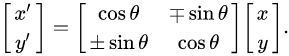

Но нам не очень хочется вычислять ее каждый раз самостоятельно. Было бы неплохо, если бы мы указали угол, и матрица построилась бы сама собой.
В OpenCV есть акая функция.

```
rot_mat = cv2.getRotationMatrix2D(center, angle, scale)
```

Интересно то, что мы выше говорили только об углах, а здесь вдруг вылез некий center и scale. Все дело в том, что данная функция возвращает матрицу Афинного преобразования, где мы можем сразу отмасштабировать изображение и выбрать точку вокруг которой будем совершать вращение.

In [ ]:
rot_mat = cv2.getRotationMatrix2D((0, 0), 30, 1.0)
print(rot_mat)

In [ ]:
alpha = 30 * np.pi / 180
np.array([[np.cos(alpha), -np.sin(alpha), 0], [np.sin(alpha), np.cos(alpha), 0]])

Знаю, что вы уже полюбили слайдеры, поэтому сделаем еще три слайдера для параметров: центр, угол и масштабирование.

In [ ]:
img = cv2.imread('./input_files/lenna.png')
img = img[:,:,::-1]

heigh, width = img.shape[:2]

def update_plot(center_x, center_y, angle, scale):
    rot_mat = cv2.getRotationMatrix2D((center_x, center_y), angle, scale)
    print(rot_mat)
    result = cv2.warpAffine(img, rot_mat, (heigh, width), flags=cv2.INTER_LINEAR)
    display(result)

center_x = widgets.IntSlider(min=0, max=width, value=width//2, description='center_x:')
center_y = widgets.IntSlider(min=0, max=heigh, value=heigh//2, description='center_y:')
angle = widgets.IntSlider(min=0, max=359, value=0, description='angle:')
scale = widgets.FloatSlider(min=0.5, max=2, value=1, description='scale:')


widgets.interactive(update_plot, center_x=center_x, center_y=center_y, angle=angle, scale=scale)

In [ ]:
img = cv2.imread('./input_files/lenna.png', )
img = img[:,:,::-1]
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
# ROTATE_90_CLOCKWISE
# ROTATE_180
# ROTATE_90_COUNTERCLOCKWISE

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img);

### Упражнение
Вспомните линейную алгебру и подберите матрицу таким образом, чтобы мы сдвинули изображение на n пикселей вправо и на m пикселей вверх. Ниже подготовлен фрагмент кода, и вам необходимо заполнить пропуски, чтобы он заработал примерно следующим образом:

При сдвиге вверх и вправо на 256 пикселей, получилась примерно следующая картинка:*italicized text*

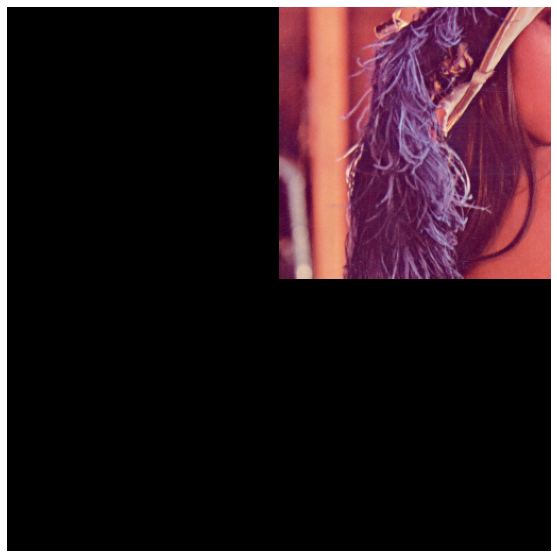

In [ ]:
img = cv2.imread('./input_files/lenna.png')
img = img[:,:,::-1]

heigh, width = img.shape[:2]

def update_plot(shift_x, shift_y):

    # Тут почти все работает, просто необходимо изменить значения матрицы,
    # подставив shift_x и shift_y в соответствующие поля
    matrix = np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)

    result = cv2.warpAffine(img, matrix, (heigh, width), flags=cv2.INTER_LINEAR)
    display(result)

shift_x = widgets.IntSlider(min=-width//2, max=width//2, value=0, description='shift_x:')
shift_y = widgets.IntSlider(min=-heigh//2, max=heigh//2, value=0, description='shift_y:')

widgets.interactive(update_plot, shift_x=shift_x, shift_y=shift_y)

## Изменение размера

Для изменения размера в OpenCV есть функция `cv2.resize()`.

она принимает следующие аргументы:

src: наше изображение.

dsize: новый размер изображения

fx: коэффициент масштабирования по оси X.

fy: коэффициент масштабирования по оси Y.

interpolation: метод интерполяции.

In [ ]:
from IPython.display import Image

In [ ]:
img = cv2.imread('./input_files/lenna.png')
img = img[:,:,::-1]
heigh, width = img.shape[:2]

def update_plot(new_width, new_heigh):

    result = cv2.resize(img, (new_width, new_heigh), interpolation=cv2.INTER_LINEAR)
    _, encoded_result = cv2.imencode('.png', result[:,:,::-1])
    display(Image(encoded_result))

new_width = widgets.IntSlider(min=0, max=1920, value=width, description='new_width:')
new_heigh = widgets.IntSlider(min=0, max=1080, value=heigh, description='new_heigh:')

widgets.interactive(update_plot, new_width=new_width, new_heigh=new_heigh)

In [ ]:
img = cv2.imread('./input_files/lenna.png', )
img = img[:,:,::-1]

def update_plot(fx, fy):

    result = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    _, encoded_result = cv2.imencode('.png', result[:,:,::-1])
    display(Image(encoded_result))

fx = widgets.FloatSlider(min=0.1, max=5, value=1, description='fx:')
fy = widgets.FloatSlider(min=0.1, max=5, value=1, description='fy:')

widgets.interactive(update_plot, fx=fx, fy=fy)

# Рисуем на картинках
В OpenCV присутствуют набор функций для отрисовки базовых объектов, таких как текст, прямоугольники, линии, овалы. <br>
Ниже мы бегло познакомимся с ними:

## Линия, вектор, прямоугольник

Для отрисовки перечисленных фигур используются функции [cv2.line](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2), [cv2.arrowedLine](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga0a165a3ca093fd488ac709fdf10c05b2) и [cv2.rectangle](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9)

In [ ]:
img = np.zeros((512, 512, 3), dtype="uint8")


colors = {'green': (0, 255, 0), 'red': (0, 0, 255), 'blue': (255, 0, 0)}
points = [(10, 10), (500, 10), (500, 500), (10, 500)]

line_width = 6
cv2.rectangle(img, points[0], points[2], colors['blue'], line_width-4)
cv2.arrowedLine(img, points[3], points[1], colors['green'], line_width)
cv2.line(img, points[2], points[0], colors['red'], line_width)

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img[:,:,::-1]);

## Круг

Для отрисовки круга нам понадобится функция
[cv2.circle](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670)

In [ ]:
img = np.zeros((512, 512, 3), dtype="uint8")
center = (256, 256)
radius = 100
line_width = 3
cv2.circle(img, center, radius, colors['blue'], line_width)

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img[...,::-1]);

## Эллипс

Для отрисовки эллипса нам понадобится функция [cv2.ellipse](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69)

In [ ]:
img = np.zeros((512, 512, 3), dtype="uint8")

center = (256, 256)
major_axis_len = 100
minor_axis_len = 50
rotation_angle = 0
start_angle = 0
end_angle = 360
line_width = 3

img = cv2.ellipse(img, center, (major_axis_len, minor_axis_len),
                  rotation_angle, start_angle, end_angle, colors['blue'], line_width)

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img[:,:,::-1]);

## Текст

Для отрисовки текста нам нужна функция [cv2.putText](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576)

In [ ]:
img = np.zeros((512, 512, 3), dtype="uint8")

position = (100, 256)
text_size = 2
thickness = 3

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', position, font, text_size, colors['blue'], thickness)

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img[:,:,::-1])

# Работа с масками и бинарными изображениями


In [ ]:
rectangle = np.zeros((512, 512), dtype="uint8")
cv2.rectangle(rectangle, (100, 100), (300, 300), 255, -1)

circle = np.zeros((512, 512), dtype = "uint8")
cv2.circle(circle, (250, 200), 100, 255, -1)

figure, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

axes[0].imshow(rectangle, cmap='gray')
axes[1].imshow(circle, cmap='gray');

In [ ]:
bitwise_and = cv2.bitwise_and(rectangle, circle)
plt.figure(figsize=(4, 4))
plt.imshow(bitwise_and, cmap='gray');

In [ ]:
bitwise_or = cv2.bitwise_or(rectangle, circle)
plt.figure(figsize=(4, 4))
plt.imshow(bitwise_or, cmap='gray');

In [ ]:
bitwise_xor = cv2.bitwise_xor(rectangle, circle)
plt.figure(figsize=(4, 4))
plt.imshow(bitwise_xor, cmap='gray');

In [ ]:
bitwise_not = cv2.bitwise_not(rectangle)
plt.figure(figsize=(4, 4))
plt.imshow(bitwise_not, cmap='gray');

In [ ]:
img = cv2.imread('./input_files/lenna.png', )
img = img[:,:,::-1]

rectangle = np.zeros((512, 512), dtype="uint8")
cv2.rectangle(rectangle, (200, 200), (350, 400), 255, -1)

mask = rectangle == 0
img[mask] = 0


plt.figure(figsize=(4, 4))
plt.imshow(img);

References:
- [opencv official web site](https://opencv.org/)
- [Scipy Lecture Notes](https://scipy-lectures.org/)
- [Цифровая обработка изображений | Гонсалес Рафаэль, Вудс Ричард](https://www.ozon.ru/product/tsifrovaya-obrabotka-izobrazheniy-gonsales-rafael-vuds-richard-242389345/?sh=ZNJzjW5E&utm_source=google&utm_medium=cpc&utm_campaign=RF_Regstore_Product_DSA_NewClients&gclid=Cj0KCQjw8p2MBhCiARIsADDUFVF3HEhYSOdzOa4Wtw7NH1rZiDgX6pZt67qSx2P8WziU2zPP_kvTd9YaAtJAEALw_wcB)

# Домашнее задание
Ниже будет скачано изображение кубика Рубика из википедии.

## 1. Преобразование цветов:

Ниже будет скачано изображение кубика Рубика из википедии. Давайте поиграемся с цветовыми пространствами, масками и заменим все синие клеточки на зеленые. Желаемый результат показан в ячейках ниже вместе с элементами кода.

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/6/61/Rubiks_cube_solved.jpg" -q -O ./input_files/cube.jpg

img = cv2.imread('./input_files/cube.jpg', )
img = img[:,:,::-1]

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(img);

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = # YOUR CODE HERE
plt.figure(figsize=(4, 4))
plt.imshow(mask, cmap='gray');

In [ ]:
img = cv2.imread('./input_files/cube.jpg')[:,:,::-1]
img[mask] = # YOUR CODE HERE
plt.figure(figsize=(4, 4))
plt.imshow(img);

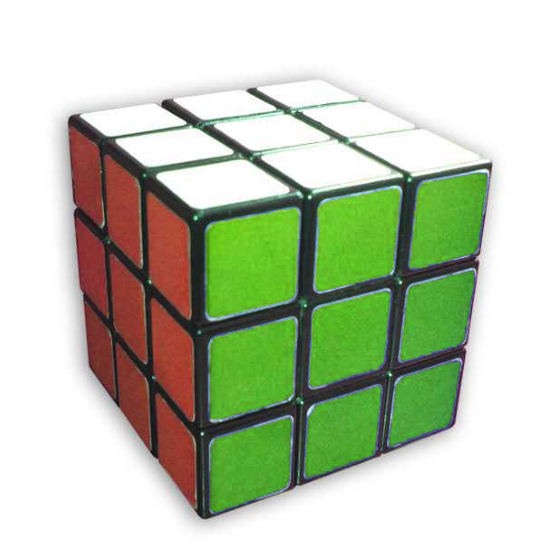

## 2. Рисование bounding-box

Скачайте с помощью `wget` любое изображение, нарисуйте ограничивающий прямоугольник, название класса объекта и скор объекта. <br>
Можно не ограничиваться одним объектом. <br>
Пример результата:

![reslut](https://drive.google.com/uc?export=view&id=1hksmUSQydpJ2PZoKDDIiGguj2X8ETlMX)